# 신경망

- 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력

### 신경망의 개요
- 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정


$$ y = h(b+w_1x_1+w_2x_2) $$
$ h(x) = \left\{\begin{array}{cc}
0\,(x\leq0) \\
1\,(x>0)
\end{array}\right.
$

>활성화 함수(activation function) : 입력 신호의 총합을 출력 신호로 변환하는 함수, 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할

$$ a = b + w_1 x_1 + w_2 x_2 \\ $$
$$ y = h(a) $$

> 일반적으로 단순 퍼셉트론은 단층 네트워크에서 계단 함수(step function, 임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델,  
> 다층 퍼셉트론은 신경망(여러 층으로 구성되고 시그모이드 함수 등의 활성화 함수를 사용하는 네트워크)을 가리킨다.

# 활성화 함수
### 시그모이드 함수(sigmoid function)

$$ h(x) = \frac{1}{1+exp(-x)} $$

$ exp(-x)$는 $e^{-x}$를 뜻하며, $e$는 자연상수로 2.7182…의 값을 갖는 실수

1. 계단 함수 구현

In [9]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# 여기서 인수 x는 실수만 받아들임. 넘파이 배열을 인수로 넣을 수는 없음

In [5]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

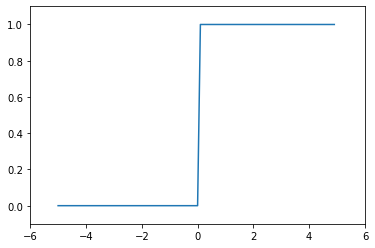

In [17]:
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

x = np.arange(-5., 5., 0.1)
y = step_function(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)     # y축의 범위 지정
plt.show()

2. 시그모이드 함수 구현

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

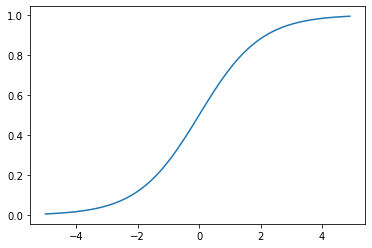

In [13]:
x = np.arange(-5., 5., 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

> 시그모이드(sigmoid)란 'S자 모양'이라는 뜻

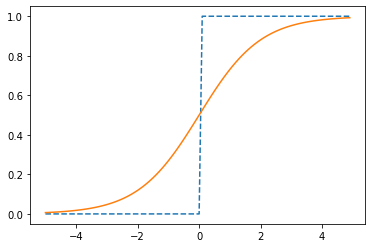

In [19]:
# 시그모이드 함수와 계단 함수 함께 그리기
x = np.arange(-5., 5., 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle='--')
plt.plot(x, y2)
plt.show()

>신경망에서는 활성화 함수로 비선형 함수를 사용해야 함

3. 렐루 함수(ReLU, Rectified Linear Unit)
- 입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하면 0을 출력

$$ h(x) = \left\{\begin{array}{cc}
x\;(x>0) \\
0\;(x\leq0)
\end{array} \right. $$

In [21]:
def relu(x):
    return np.maximum(0, x)     # maximum은 두 입력 중 큰 값을 선택해 반환함

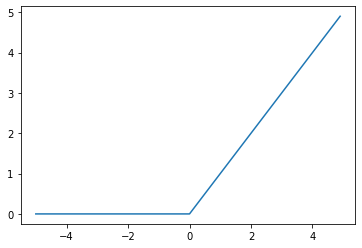

In [22]:
x = np.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [23]:
X = np.array([1, 2])
X.shape

(2,)

In [24]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [25]:
W.shape

(2, 3)

In [26]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


- 3층 신경망 구현

In [30]:
X = np.array([1., 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape, X.shape, B1.shape)
A1 = np.dot(X, W1) + B1
print(A1)

(2, 3) (2,) (3,)
[0.3 0.7 1.1]


In [31]:
Z1 = sigmoid(A1)

print(A1, Z1)

[0.3 0.7 1.1] [0.57444252 0.66818777 0.75026011]


In [32]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape, W2.shape, B2.shape)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2, Z2, Z2.shape)

(3,) (3, 2) (2,)
[0.51615984 1.21402696] [0.62624937 0.7710107 ] (2,)


In [34]:
def identity_function(x):       # 항등 함수 : 입력을 그대로 출력하는 함수
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) +B3
Y = identity_function(A3)

> 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.<br/>예를 들어 회귀에는 항등 함수, 2클래스 분류에는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적

- 구현 정리

In [38]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

    

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1., 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


>분류(classification)는 데이터가 어느 클래스에 속하느냐, 추측하고자 하는 데이터가 범주형 데이터일 때(성별 분류 등)  
>회귀(regression)는 연속적인 수치 예측(사진 속 인물의 몸무게 예측 등)  
- 데이터에 독립 변수와 종속 변수가 있고 종속변수가 숫자일 때 회귀, 이름일 때 분류

- 항등 함수(identity function), 소프트맥스 함수(softmax function) 구현

소프트맥스 함수 식
$$ y_k = \frac{exp(a_k)}{\sum\limits_{i=1}^n exp(a_i)} $$

$exp(x)$는 $e^x$를 뜻하는 지수 함수(exponential function).(e는 자연상수)  
$n$은 출력층의 뉴런 수, $y_k$는 그 중 k번째 출력임을 뜻함  
소프트맥수 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성됨

In [40]:
a = np.array([0.3, 2.9, 4.])

exp_a = np.exp(a)       # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [41]:
sum_exp_a = np.sum(exp_a)       # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [42]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [43]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

- 소프트맥스 함수 구현 시 주의점 : overflow 발생 >> 개선

$$ \begin{align*} y_k = \frac{exp(a_k)}{\sum\limits_{i=1}^n exp(a_i)} & = \frac{C \, exp (a_k)}{C\sum\limits_{i=1}^n exp(a_i)} \\
& = \frac{exp(a_k + logC)}{\sum\limits_{i=1}^n exp(a_i + logC)} \\
& = \frac{exp(a_k + C')}{\sum\limits_{i=1}^n exp(a_i + C')}
\end{align*}$$

1. C라는 임의의 정수를 분자와 분모 양쪽에 곱함  
2. C를 지수함수 안으로 옮겨 logC로 만듦  
3. logC를 C'라는 새로운 기호로 바꿈

> 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않는다.  
> C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적.

In [45]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))   # 소프트맥수 함수 계산

<ipython-input-45-f38ee5a45f56>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))   # 소프트맥수 함수 계산
<ipython-input-45-f38ee5a45f56>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))   # 소프트맥수 함수 계산


array([nan, nan, nan])

In [46]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [47]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [49]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [50]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y, np.sum(y))

[0.01821127 0.24519181 0.73659691] 1.0


- 소프트맥수 함수의 특징  
소프트맥수 함수의 출력은 0에서 1.0 사이의 실수이다. 또, 소프트맥스 함수 출력의 총합은 1이다. >> 소프트맥스 함수의 출력을 확률로 해석할 수 있음  
  
신경망을 이용한 분류에서 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하며, 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않음.  
>결과적으로, 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 됨.

- 기계학습의 문제 풀이는 학습과 추론(inference)의 두 단계를 거쳐 이루어진다.  
추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적.  
> 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수 사용.

- 출력층의 뉴런 수 정하기 : 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적임

#### 손글씨 숫자 인식  
학습된 매개변수를 사용해 학습 과정 생략하고 추론 과정만 구현.  
이 추론 과정을 신경망의 순전파(forward propagation)라고 함

In [51]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from basic_DL.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)       # 

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [53]:
# 각 데이터의 형상 출력
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [57]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label, img.shape)

img = img.reshape(28, 28)       # 데이터 불러올 때 flatten = True로 해서 1차원 변환한 걸 원래 모양대로
print(img.shape)
img_show(img)

5 (784,)
(28, 28)


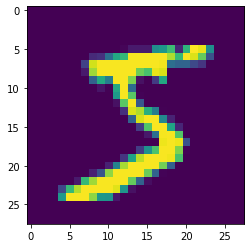

In [59]:
# 외부 프로그램에서 열리니까 여기서 바로 보자
plt.imshow(img)

- 신경망의 추론 처리  
입력층 뉴련 784개(이미지 크기가 28*28=784), 출력층 뉴런 10개(0~9까지 숫자 구분)  
은닉층 총 2개 : 첫 번째 은닉층에는 뉴런 50개, 두 번째 은닉층에는 100개 배치(50, 100은 임의로 정한 값)

In [62]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# 학습된 가중치 매개변수 읽기. 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있음
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

- 데이터 불러올 때 normalize를 True로 해서 0~255 범위의 픽셀값을 0.0~1.0 범위로 변환함  
이렇게 데이터를 특정 범위로 변환하는 처리를 정규화(normalization)라고 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리(pre-processing)라고 함

In [63]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)        # 확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


- 배치 처리

In [64]:
# 앞서 구현한 신경망 각 층의 가중치 형상 출력
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape, x[0].shape, W1.shape, W2.shape, W3.shape

((10000, 784), (784,), (784, 50), (50, 100), (100, 10))

> 103p  
하나로 묶은 입력 데이터를 배치(batch)라고 함(일괄, 묶음처리)

- 배치 처리 구현

In [66]:
x, t = get_data()
network = init_network()

batch_size = 100    # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다  
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다
- 출력층의 활성화 함수로 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다